# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition

np.random.seed(5)
%matplotlib inline


In [2]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

print(f"length of data: {len(X)}")
print(f"digits.data:\n{X}")
print(f"digits.target\n{y}")


length of data: 537
digits.data:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  1. 10. ... 10.  9.  0.]
 [ 0.  0. 15. ...  6.  2.  0.]
 [ 0.  0.  6. ...  6.  0.  0.]]
digits.target
[0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0 1 2 1 1 1 1 0 1 2 2
 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0 1 2 1 1 1 1 0 1
 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0 1 2 1 1 1 1
 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0 1 2 1 1
 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0 1 2
 1 1 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0
 1 2 1 1 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2
 0 0 1 2 1 1 1 1 0 1 2 2 2 0 1 2 0 1 2 0 1 2 0 0 1 1 2 2 0 1 2 1 0 2 2 0 0
 1 2 1 1 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 0 1 2 1 0 2 2 0 0
 1 2 1 1 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2
 0 0 1 2 1 

載入 相關套件 並 執行 PCA 實驗 ...

X after transform:
[[ 28.47993992  -3.43359359   1.03184835]
 [-22.59666568  17.80122274   6.11085609]
 [ -8.83188035  11.46680509   2.01624684]
 ...
 [-22.05029473 -16.58404599  -5.73396933]
 [-16.44102253 -17.48311967  -3.95362923]
 [ 28.5723742    1.03814293   5.45381184]]
minimum:
[-29.31043058 -25.16444417 -26.34699242]
maximum:
[33.11299008 39.45167352 29.5355778 ]


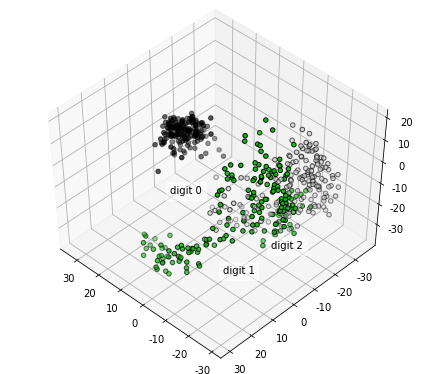

In [3]:
# 設定 模型 估計參數
pca = decomposition.PCA(n_components=3)

# 資料建模 並 視覺化 結果
pca.fit(X)
X = pca.transform(X)
# Paul Chi
print(f"X after transform:\n{X}")
print(f"minimum:\n{np.amin(X, axis = 0)}")
print(f"maximum:\n{np.amax(X, axis = 0)}")

fig = plt.figure(1, figsize=(6, 5))
plt.clf()   # clear current figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()   # clear current axes


for name, label in [('digit 0', 0), ('digit 1', 1), ('digit 2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean() - 30, name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [0, 1, 2]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([-30, -20, -10, 0, 10, 20, 30])
ax.w_yaxis.set_ticklabels([-30, -20, -10, 0, 10, 20, 30])
ax.w_zaxis.set_ticklabels([-30, -20, -10, 0, 10, 20, 30])

plt.show()
